In [1]:
# import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import time

# Select the processor device

In [2]:
# use GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


# Build a simple model

In [3]:
net = nn.Sequential(
    nn.Linear(20, 100),
    nn.ReLU(),
    nn.Linear(100, 500),
    nn.ReLU(),
    nn.Linear(500, 30),
    nn.ReLU(),
    nn.Linear(30, 2)
)

# Make some data

In [4]:
# just some random fluff
data   = torch.randn((1000,20)) # samples X features
labels = torch.randint(low=0,high=2,size=(1,1000))

# Send the model and the data to the GPU

In [5]:
# model
net.to(device)

# data
data   = data.to(device)
labels = labels.to(device)

In [6]:
data

tensor([[ 2.3395, -0.5312, -1.3531,  ..., -2.4012, -0.1702,  0.0148],
        [ 0.6360,  0.4188, -0.0443,  ...,  1.2425,  1.3902,  0.2769],
        [ 2.1536,  0.0785, -0.3376,  ...,  0.6291, -0.9872, -0.6629],
        ...,
        [ 0.3194, -0.2072,  0.2701,  ...,  0.4849, -1.3742, -0.6752],
        [-0.0766, -0.7860,  0.6543,  ...,  1.5741,  0.0195, -0.3192],
        [ 0.7146,  1.6086, -0.3232,  ..., -0.4618,  0.0979, -1.7444]],
       device='cuda:0')

In [7]:
# you can also create data directly on the GPU
dataG = torch.randn((1000,20), device=device)
dataC = torch.randn((1000,20), device='cpu')

print(data.device)
print(dataG.device)
print(dataC.device)

cuda:0
cuda:0
cpu


# Getting results from the model

In [8]:
output = net(data)

In [9]:
output.device

device(type='cuda', index=0)

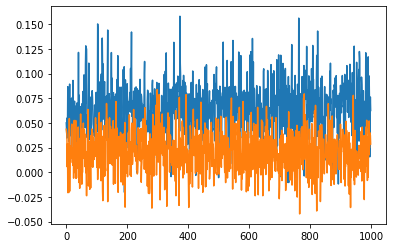

In [11]:
# try to plot the data
# plt.plot(output.detach());

plt.plot(output.detach().cpu());

# Experiment: Computation time

In [12]:
# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cuda:0'
net.to(device)
data   = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
GPUtime = 1000*(time.process_time() - starttime)

In [13]:
# start the clock
starttime = time.process_time()

# move, run, retrieve
device = 'cpu'
net.to(device)
data   = data.to(device)
labels = labels.to(device)
output = net(data).detach().cpu()

# stop the clock
CPUtime = 1000*(time.process_time() - starttime)

In [14]:
# time in ms
[CPUtime,GPUtime]

[0.0, 0.0]

In [ ]:
# but maybe "sending" it to the CPU takes too much overhead?

In [15]:
# recreate network and data
net  = nn.Sequential(nn.Linear(20,100),nn.ReLU(),nn.Linear(100,500),nn.ReLU(),nn.Linear(500,30),nn.ReLU(),nn.Linear(30,2))
data = torch.randn((1000,20))

# rerun the experiment
starttime = time.process_time()
output    = net(data).detach()
CPUtime2  = 1000*(time.process_time() - starttime)

# report the results
[CPUtime2, CPUtime, GPUtime]

[0.0, 0.0, 0.0]